In [3]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [4]:
#Read dataset 
tnames = ['user_id', 'movie_id', 'tag', 'timestamp'] 
tags = pd.read_table('./raw/ml-10M100K/tags.dat', sep='::', header=None, names=tnames, engine='python') 
rnames = ['user_id', 'movie_id', 'rating', 'timestamp'] 
ratings = pd.read_table('./raw/ml-10M100K/ratings.dat', sep='::', header=None, names=rnames, engine='python') 
mnames = ['movie_id', 'title', 'genres'] 
movies = pd.read_table('./raw/ml-10M100K/movies.dat', sep='::', header=None, names=mnames, engine='python')

FileNotFoundError: [Errno 2] No such file or directory: './raw/ml-10M100K/ratings.dat'

In [ ]:
# Movies
print("Movies dataset info:")
print(movies.info())
print(movies.head(), "\n")

# Ratings
print("Ratings dataset info:")
print(ratings.info())
print(ratings.head(), "\n")

# Tags
print("Tags dataset info:")
print(tags.info())
print(tags.head())


Movies dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10681 entries, 0 to 10680
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  10681 non-null  int64 
 1   title     10681 non-null  object
 2   genres    10681 non-null  object
dtypes: int64(1), object(2)
memory usage: 250.5+ KB
None
   movie_id                               title  \
0         1                    Toy Story (1995)   
1         2                      Jumanji (1995)   
2         3             Grumpier Old Men (1995)   
3         4            Waiting to Exhale (1995)   
4         5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Ratings dataset info:

In [ ]:

print("Ratings statistics:")
print(ratings['rating'].describe())
print("Valores únicos de rating:", ratings['rating'].unique(), "\n")

print("Número de etiquetas únicas:", tags['tag'].nunique())
print("Ejemplos de tags:", tags['tag'].unique()[:10], "\n")

print("Géneros únicos en movies:")
genres = set()
for g in movies['genres'].str.split('|'):
    genres.update(g)
print(genres)


Ratings statistics:
count    1.000005e+07
mean     3.512422e+00
std      1.060418e+00
min      5.000000e-01
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Valores únicos de rating: [5.  3.  2.  4.  4.5 3.5 1.  1.5 2.5 0.5] 

Número de etiquetas únicas: 16528
Ejemplos de tags: ['excellent!' 'politics' 'satire' 'chick flick 212' 'hanks' 'ryan'
 'action' 'bond' 'spoof' 'star wars'] 

Géneros únicos en movies:
{'Children', '(no genres listed)', 'Western', 'Drama', 'Crime', 'Film-Noir', 'Horror', 'Romance', 'War', 'Documentary', 'Musical', 'IMAX', 'Fantasy', 'Action', 'Mystery', 'Animation', 'Sci-Fi', 'Thriller', 'Comedy', 'Adventure'}


In [ ]:
print("Datos faltantes en movies:\n", movies.isnull().sum(), "\n")
print("Datos faltantes en ratings:\n", ratings.isnull().sum(), "\n")
print("Datos faltantes en tags:\n", tags.isnull().sum())


Datos faltantes en movies:
 movie_id    0
title       0
genres      0
dtype: int64 

Datos faltantes en ratings:
 user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64 

Datos faltantes en tags:
 user_id       0
movie_id      0
tag          16
timestamp     0
dtype: int64


In [ ]:
# Cantidad de usuarios y películas únicas
print("Usuarios únicos en ratings:", ratings['user_id'].nunique())
print("Películas únicas en ratings:", ratings['movie_id'].nunique())

print("Usuarios únicos en tags:", tags['user_id'].nunique())
print("Películas únicas en tags:", tags['movie_id'].nunique())

print("Películas únicas en movies:", movies['movie_id'].nunique())


Usuarios únicos en ratings: 69878
Películas únicas en ratings: 10677
Usuarios únicos en tags: 4009
Películas únicas en tags: 7601
Películas únicas en movies: 10681


In [ ]:
# Promedio de rating por película
avg_rating = ratings.groupby('movie_id')['rating'].mean().sort_values(ascending=False)
print(avg_rating.head())

# Número de ratings por película
count_rating = ratings.groupby('movie_id')['rating'].count().sort_values(ascending=False)
print(count_rating.head())


movie_id
42783    5.0
64275    5.0
33264    5.0
51209    5.0
53355    5.0
Name: rating, dtype: float64
movie_id
296    34864
356    34457
593    33668
480    32631
318    31126
Name: rating, dtype: int64


In [ ]:
tags

,user_id,movie_id,tag,timestamp
0,15,4973,excellent!,1215184630
1,20,1747,politics,1188263867
2,20,1747,satire,1188263867
3,20,2424,chick flick 212,1188263835
4,20,2424,hanks,1188263835
...,...,...,...,...
95575,71556,1377,Gothic,1188263571
95576,71556,2424,chick flick,1188263606
95577,71556,3033,comedy,1188263626
95578,71556,3081,Gothic,1188263565


In [ ]:
ratings

,user_id,movie_id,rating,timestamp
0,1,122,5.0,838985046
1,1,185,5.0,838983525
2,1,231,5.0,838983392
3,1,292,5.0,838983421
4,1,316,5.0,838983392
...,...,...,...,...
10000049,71567,2107,1.0,912580553
10000050,71567,2126,2.0,912649143
10000051,71567,2294,5.0,912577968
10000052,71567,2338,2.0,912578016


In [ ]:
movies

,movie_id,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
10676,65088,Bedtime Stories (2008),Adventure|Children|Comedy
10677,65091,Manhattan Melodrama (1934),Crime|Drama|Romance
10678,65126,Choke (2008),Comedy|Drama
10679,65130,Revolutionary Road (2008),Drama|Romance


In [ ]:
# Duplicates in movies
movies_duplicates = movies[movies.duplicated()]
print("Movies duplicates:", len(movies_duplicates))
#Delete duplicates
if len(movies_duplicates) > 0:
    movies_clean = movies.drop_duplicates().reset_index(drop=True)
    print("Number of movies records before duplicates cleaning: ", len(movies), " and after: ", len(movies_clean))

# Duplicates in ratings
ratings_duplicates = ratings[ratings.duplicated()]
print("Ratings duplicates:", len(ratings_duplicates))
#Delete duplicates
if len(ratings_duplicates) > 0:
    ratings_clean = ratings.drop_duplicates().reset_index(drop=True)
    print("Number of ratings records before duplicates cleaning: ", len(ratings), " and after: ", len(ratings_clean))

# Duplicates in tags
tags_duplicates = tags[tags.duplicated()]
print("Tags duplicates:", len(tags_duplicates))
#Delete duplicates
if len(tags_duplicates) > 0:
    tags_clean = tags.drop_duplicates().reset_index(drop=True)
    print("Number of tags records before duplicates cleaning: ", len(tags), " and after: ", len(tags_clean))



Movies duplicates: 0
Ratings duplicates: 0
Tags duplicates: 0


In [ ]:
print("Missing values in movies:")
print(movies.isnull().sum())

print("\nMissing values in ratings:")
print(ratings.isnull().sum())

print("\nMissing values in tags:")
print(tags.isnull().sum())

#Identify missing records
movies_missing_rows = movies[movies.isnull().any(axis=1)]
ratings_missing_rows = ratings[ratings.isnull().any(axis=1)]
tags_missing_rows = tags[tags.isnull().any(axis=1)]

#Remove duplicates in tags table
tags = tags.dropna().reset_index(drop=True)
tags = tags[tags['tag'].str.strip() != '']

Missing values in movies:
movie_id    0
title       0
genres      0
dtype: int64

Missing values in ratings:
user_id      0
movie_id     0
rating       0
timestamp    0
dtype: int64

Missing values in tags:
user_id       0
movie_id      0
tag          16
timestamp     0
dtype: int64


In [ ]:
#Identify data types
print(movies.dtypes)
#Transform data type object to string
movies["title"] = movies["title"].astype("string")
movies["genres"] = movies["genres"].astype("string")

#Identify data types
print(ratings.dtypes)
#Identify data types
print(tags.dtypes)
#Transform data type object to string
tags["tag"] = tags["tag"].astype("string")


movie_id     int64
title       object
genres      object
dtype: object
user_id        int64
movie_id       int64
rating       float64
timestamp      int64
dtype: object
user_id       int64
movie_id      int64
tag          object
timestamp     int64
dtype: object


<h3> Visualizations <h3>

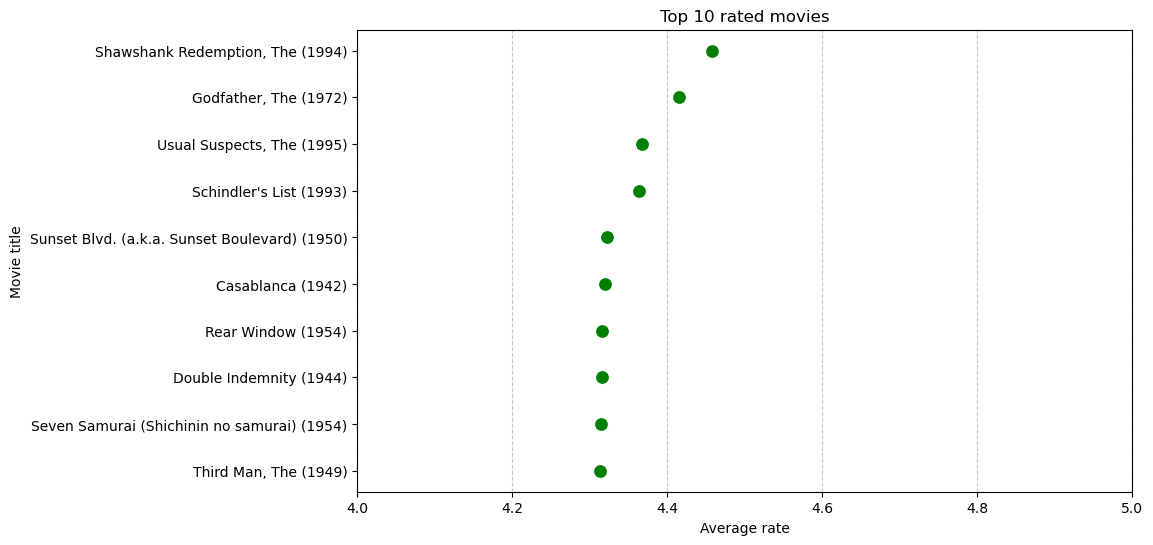

In [ ]:
# Calculate average rating and rating count by movie
movie_ratings = ratings.groupby('movie_id').agg({'rating': ['mean', 'count']})
movie_ratings.columns = ['avg_rating', 'num_ratings']
movie_ratings = movie_ratings.reset_index()

# Filter movies with at least 50 ratins 
top_movies = movie_ratings[movie_ratings['num_ratings'] >= 50].sort_values('avg_rating', ascending=False).head(10)

# Merge titles into one 
top_movies = top_movies.merge(movies[['movie_id', 'title']], on='movie_id')

# Plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='avg_rating', y='title', s=100, color='green', data=top_movies)
plt.title('Top 10 rated movies')
plt.xlabel('Average rate')
plt.ylabel('Movie title')
plt.xlim(4, 5)  # opcional si el rating es 0-5
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/487295390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')


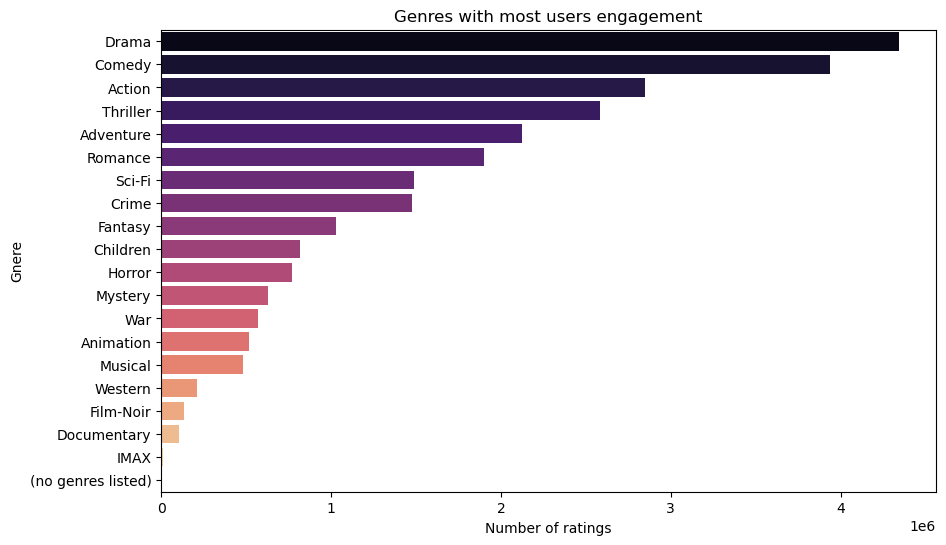

In [ ]:
movies_expanded = movies.copy()
movies_expanded = movies_expanded.assign(genres = movies_expanded['genres'].str.split('|')).explode('genres')

ratings_genres = ratings.merge(movies_expanded[['movie_id','genres']], on='movie_id')
genre_counts = ratings_genres['genres'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='magma')
plt.title('Genres with most users engagement')
plt.xlabel('Number of ratings')
plt.ylabel('Gnere')
plt.show()


In [ ]:
avg_rating = ratings['rating'].mean()
print(f"Calificación promedio general: {avg_rating:.2f}")

Calificación promedio general: 3.51


/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/883287911.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=ratings, palette='coolwarm')


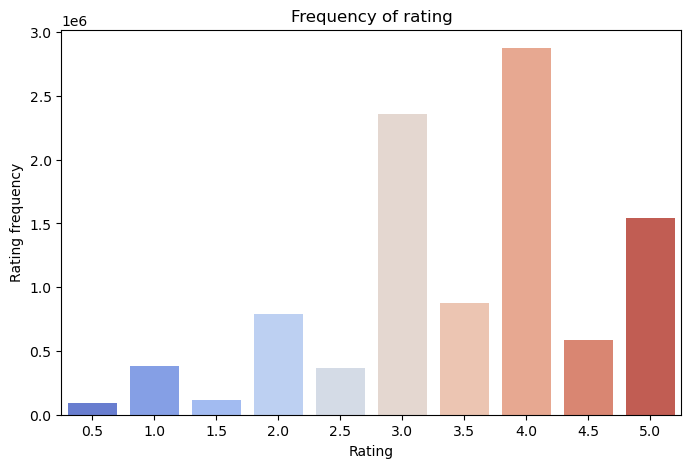

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='rating', data=ratings, palette='coolwarm')
plt.title('Frequency of rating')
plt.xlabel('Rating')
plt.ylabel('Rating frequency')
plt.show()

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/892179814.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_users.values, x=top_users.index, palette='Set2')


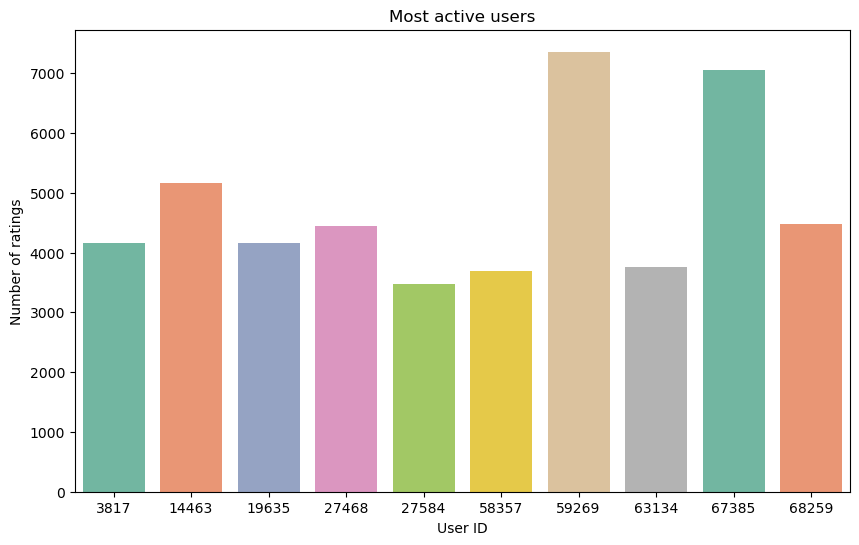

In [ ]:
top_users = ratings['user_id'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(y=top_users.values, x=top_users.index, palette='Set2')
plt.title('Most active users')
plt.ylabel('Number of ratings')
plt.xlabel('User ID')
plt.show()


/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/797518565.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='coolwarm')


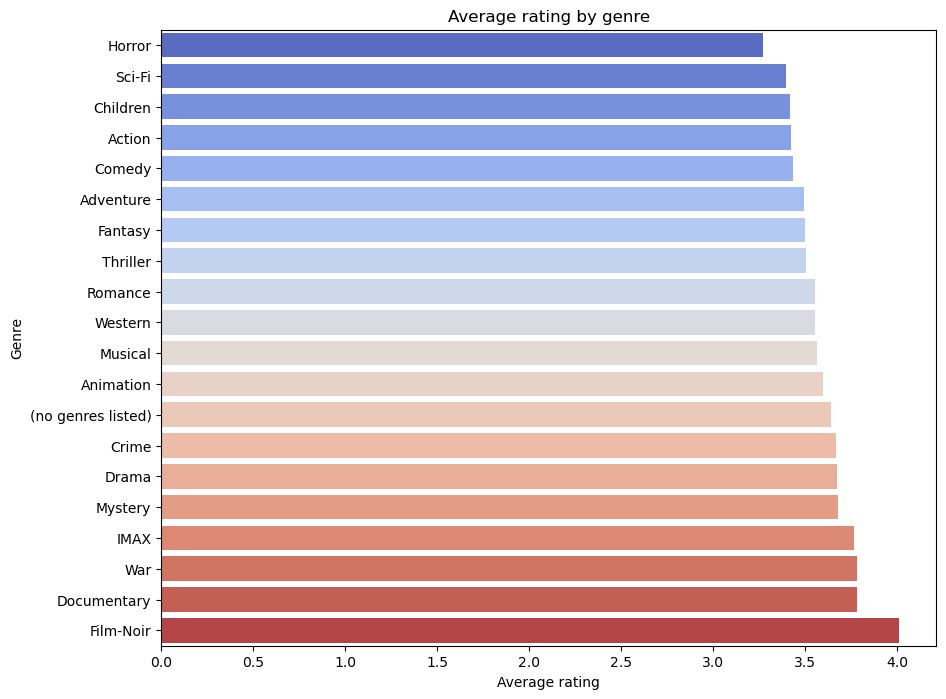

In [ ]:
genre_ratings = ratings_genres.groupby('genres')['rating'].mean().sort_values()
plt.figure(figsize=(10,8))
sns.barplot(x=genre_ratings.values, y=genre_ratings.index, palette='coolwarm')
plt.title('Average rating by genre')
plt.xlabel('Average rating')
plt.ylabel('Genre')
plt.show()


/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/849047811.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tags.values, y=top_tags.index, palette='plasma')


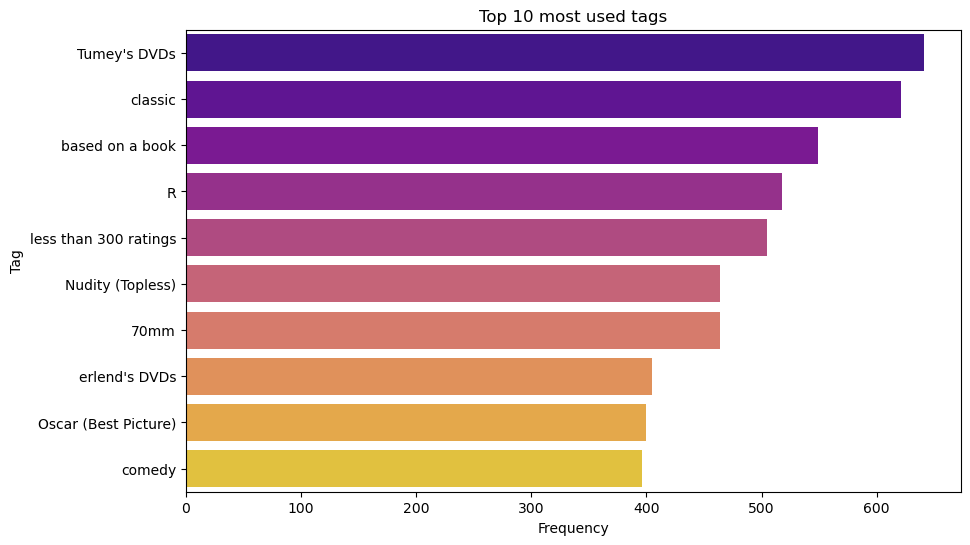

In [ ]:
top_tags = tags['tag'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_tags.values, y=top_tags.index, palette='plasma')
plt.title('Top 10 most used tags')
plt.xlabel('Frequency')
plt.ylabel('Tag')
plt.show()


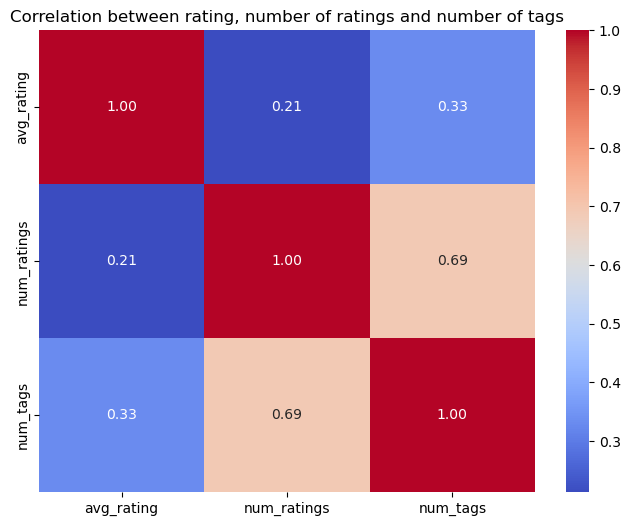

In [ ]:
movie_tags = tags.groupby('movie_id').size().reset_index(name='num_tags')

movie_summary = movie_ratings.merge(movie_tags, on='movie_id', how='left')
corr = movie_summary[['avg_rating','num_ratings','num_tags']].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between rating, number of ratings and number of tags')
plt.show()


<h3> Data quality metrics <h3>

Movies completeness:
          missing_values  completeness_%
movie_id               0           100.0
title                  0           100.0
genres                 0           100.0

Ratings completeness:
           missing_values  completeness_%
user_id                 0           100.0
movie_id                0           100.0
rating                  0           100.0
timestamp               0           100.0

Tags completeness:
           missing_values  completeness_%
user_id                 0           100.0
movie_id                0           100.0
tag                     0           100.0
timestamp               0           100.0


/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/3255599478.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_movies.index, y=comp_movies['completeness_%'], palette='PuRd')


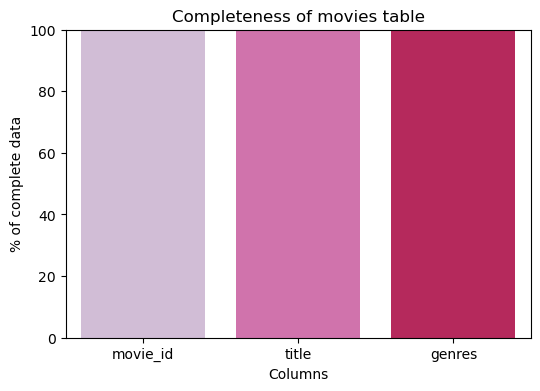

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/3255599478.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_ratings.index, y=comp_ratings['completeness_%'], palette='PuRd')


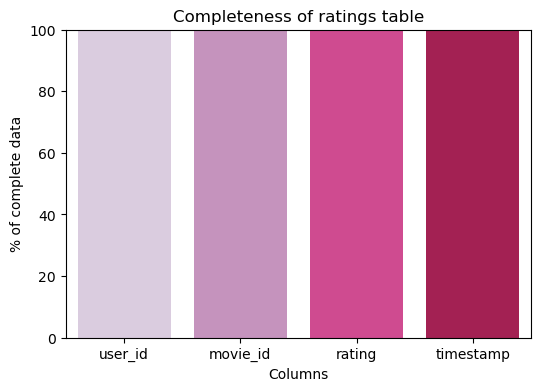

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/3255599478.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=comp_tags.index, y=comp_tags['completeness_%'], palette='PuRd')


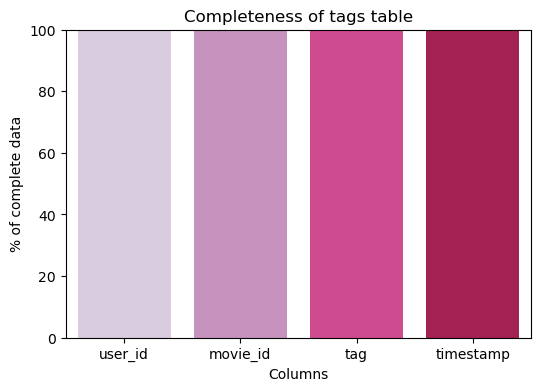

In [ ]:
#Completeness
def completeness(df):
    missing = df.isnull().sum()
    completeness_pct = 100 * (1 - missing / len(df))
    return pd.DataFrame({'missing_values': missing, 'completeness_%': completeness_pct})

comp_tags = completeness(tags)
comp_movies = completeness(movies)
comp_ratings = completeness(ratings)

print("Movies completeness:")
print(comp_movies)
print("\nRatings completeness:")
print(comp_ratings)
print("\nTags completeness:")
print(comp_tags)

#MOVIES
plt.figure(figsize=(6,4))
sns.barplot(x=comp_movies.index, y=comp_movies['completeness_%'], palette='PuRd')
plt.ylim(0, 100)
plt.title('Completeness of movies table')
plt.ylabel('% of complete data')
plt.xlabel('Columns')
plt.show()

#RATINGS
plt.figure(figsize=(6,4))
sns.barplot(x=comp_ratings.index, y=comp_ratings['completeness_%'], palette='PuRd')
plt.ylim(0, 100)
plt.title('Completeness of ratings table')
plt.ylabel('% of complete data')
plt.xlabel('Columns')
plt.show()

#TAGS
plt.figure(figsize=(6,4))
sns.barplot(x=comp_tags.index, y=comp_tags['completeness_%'], palette='PuRd')
plt.ylim(0, 100)
plt.title('Completeness of tags table')
plt.ylabel('% of complete data')
plt.xlabel('Columns')
plt.show()

Conistency for movie table
     column  is_consistent
0  movie_id           True
1     title           True
2    genres           True

Conistency for ratings table
      column  is_consistent
0    user_id           True
1   movie_id           True
2     rating           True
3  timestamp           True

Conistency for tag table
      column  is_consistent
0    user_id           True
1   movie_id           True
2        tag           True
3  timestamp           True


/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/1901149825.py:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cons_movies['column'], y=cons_movies['is_consistent'].astype(int)*100, palette=palette)


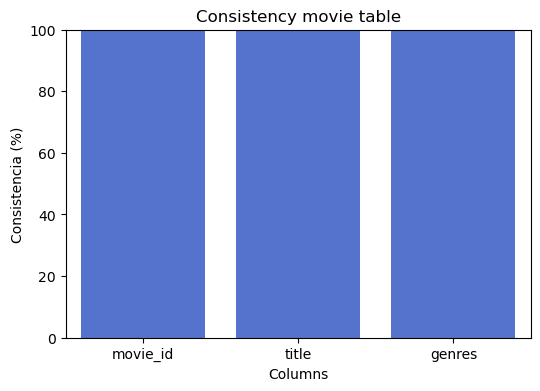

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/1901149825.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cons_ratings['column'], y=cons_ratings['is_consistent'].astype(int)*100, palette=palette)


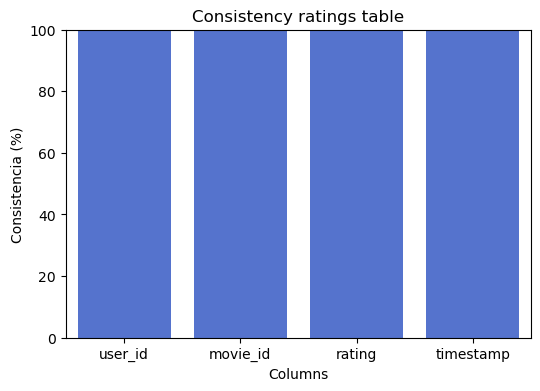

/var/folders/7_/g3dp04p55rsfcmcwlnb1trzc0000gn/T/ipykernel_2113/1901149825.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cons_tags['column'], y=cons_tags['is_consistent'].astype(int)*100, palette=palette)


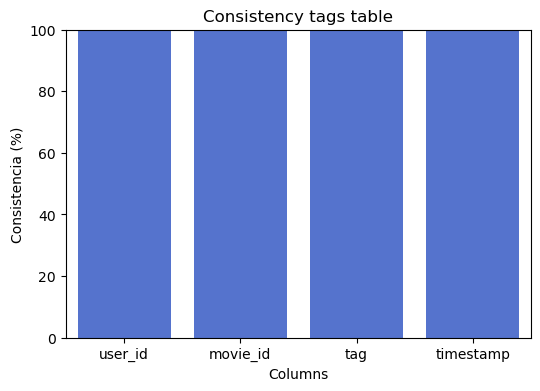

In [ ]:
#Consistency
def consistency(df, expected_types):
    result = {}
    for col, dtype in expected_types.items():
        actual_dtype = df[col].dtype
        result[col] = actual_dtype == dtype
    return pd.DataFrame(list(result.items()), columns=['column','is_consistent'])

expected_movies_types = {
    'movie_id': 'int64',
    'title': 'string',  
    'genres': 'string'
}

expected_ratings_types = {
    'user_id': 'int64',
    'movie_id': 'int64',  
    'rating': 'float64',
    'timestamp': 'int64'
}

expected_tags_types = {
    'user_id': 'int64',
    'movie_id': 'int64',  
    'tag': 'string',
    'timestamp': 'int64'
}

cons_movies = consistency(movies, expected_movies_types)
cons_ratings = consistency(ratings, expected_ratings_types)
cons_tags = consistency(tags, expected_tags_types)


print("Conistency for movie table")
print(cons_movies)
print("")
print("Conistency for ratings table")
print(cons_ratings)
print("")
print("Conistency for tag table")
print(cons_tags)

#MOVIES
palette = ['royalblue' if x else 'red' for x in cons_movies['is_consistent']]
plt.figure(figsize=(6,4))
sns.barplot(x=cons_movies['column'], y=cons_movies['is_consistent'].astype(int)*100, palette=palette)
plt.ylim(0, 100)
plt.title('Consistency movie table')
plt.ylabel('Consistencia (%)')
plt.xlabel('Columns')
plt.show()

#RATINGS
palette = ['royalblue' if x else 'red' for x in cons_ratings['is_consistent']]
plt.figure(figsize=(6,4))
sns.barplot(x=cons_ratings['column'], y=cons_ratings['is_consistent'].astype(int)*100, palette=palette)
plt.ylim(0, 100)
plt.title('Consistency ratings table')
plt.ylabel('Consistencia (%)')
plt.xlabel('Columns')
plt.show()

#TAGS
palette = ['royalblue' if x else 'red' for x in cons_tags['is_consistent']]
plt.figure(figsize=(6,4))
sns.barplot(x=cons_tags['column'], y=cons_tags['is_consistent'].astype(int)*100, palette=palette)
plt.ylim(0, 100)
plt.title('Consistency tags table')
plt.ylabel('Consistencia (%)')
plt.xlabel('Columns')
plt.show()


Movies uniqueness:
   total_rows  duplicate_rows  uniqueness_%
0       10681               0         100.0
Ratings uniqueness:
   total_rows  duplicate_rows  uniqueness_%
0    10000054               0         100.0
Tags uniqueness:
   total_rows  duplicate_rows  uniqueness_%
0       95558               0         100.0


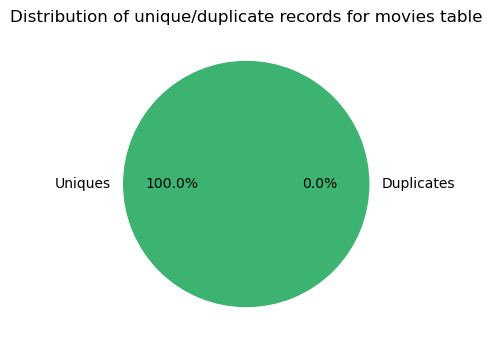

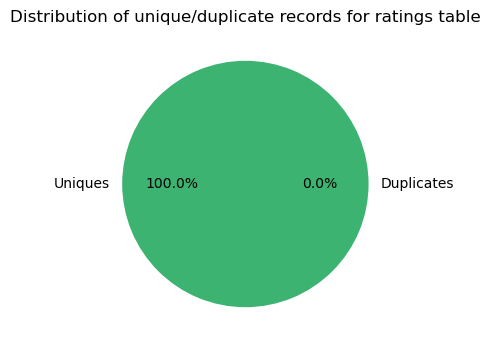

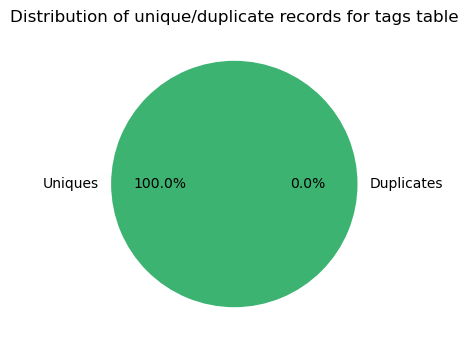

In [ ]:
#Uniqueness
def uniqueness(df):
    total_rows = len(df)
    duplicate_rows = df.duplicated().sum()
    unique_pct = 100 * (1 - duplicate_rows / total_rows)
    return pd.DataFrame({'total_rows': [total_rows], 
                         'duplicate_rows': [duplicate_rows], 
                         'uniqueness_%': [unique_pct]})

uniq_movies = uniqueness(movies)
uniq_ratings = uniqueness(ratings)
uniq_tags = uniqueness(tags)

print("Movies uniqueness:")
print(uniq_movies)
print("Ratings uniqueness:")
print(uniq_ratings)
print("Tags uniqueness:")
print(uniq_tags)

plt.figure(figsize=(4,4))
plt.pie([uniq_movies['uniqueness_%'][0], 100-uniq_movies['uniqueness_%'][0]], labels=['Uniques','Duplicates'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Distribution of unique/duplicate records for movies table')
plt.show()

plt.figure(figsize=(4,4))
plt.pie([uniq_ratings['uniqueness_%'][0], 100-uniq_ratings['uniqueness_%'][0]], labels=['Uniques','Duplicates'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Distribution of unique/duplicate records for ratings table')
plt.show()

plt.figure(figsize=(4,4))
plt.pie([uniq_tags['uniqueness_%'][0], 100-uniq_tags['uniqueness_%'][0]], labels=['Uniques','Duplicates'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Distribution of unique/duplicate records for tags table')
plt.show()


Invalid ratings:  0
Invalid movie_ids:  0
Empty tags:  0


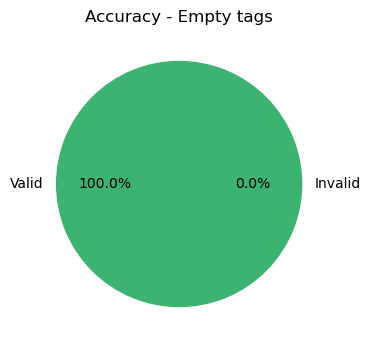

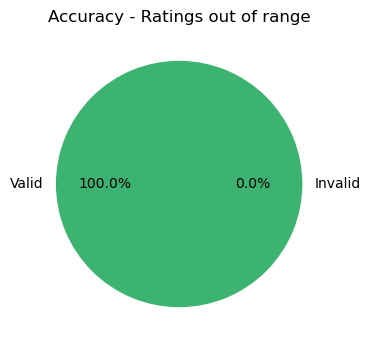

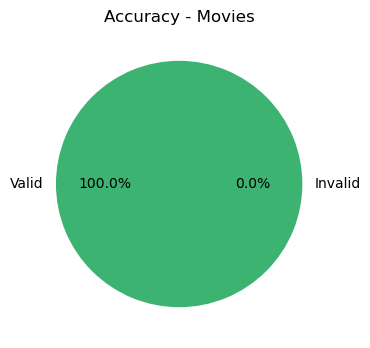

In [ ]:
#Accuracy
def accuracy_ratings(df):
    invalid_ratings = df[(df['rating'] < 0) | (df['rating'] > 5)].shape[0]
    return invalid_ratings

def accuracy_movies(df):
    invalid_ids = df[df['movie_id'] <= 0].shape[0]
    return invalid_ids

def accuracy_tags(df):
    empty_tags = df[df['tag'].isnull() | (df['tag'].str.strip()=='')].shape[0]
    return empty_tags

print("Invalid ratings: ", accuracy_ratings(ratings))
print("Invalid movie_ids: ", accuracy_movies(movies))
print("Empty tags: ", accuracy_tags(tags))

invalid_tags = accuracy_tags(tags)
valid_count = len(tags) - invalid_tags

#TAGS
plt.figure(figsize=(4,4))
plt.pie([valid_count, invalid_tags], labels=['Valid','Invalid'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Accuracy - Empty tags')
plt.show()


invalid_ratings_count = accuracy_ratings(ratings)
valid_ratings_count = len(ratings) - invalid_ratings_count

plt.figure(figsize=(4,4))
plt.pie([valid_ratings_count, invalid_ratings_count], labels=['Valid','Invalid'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Accuracy - Ratings out of range')
plt.show()

#MOVIES
invalid_movies_count =accuracy_movies(movies)
valid_movies_count = len(movies) - invalid_movies_count

values = [valid_movies_count, invalid_movies_count]

# Gráfico simple
plt.figure(figsize=(4,4))
plt.pie(values, labels=['Valid','Invalid'], autopct='%1.1f%%', colors=['mediumseagreen','lightcoral'])
plt.title('Accuracy - Movies')
plt.show()


In [ ]:
# # Definir versiones finales limpias
# movies_final = movies_clean if 'movies_clean' in globals() else movies
# ratings_final = ratings_clean if 'ratings_clean' in globals() else ratings
# tags_final = tags_clean if 'tags_clean' in globals() else tags


In [ ]:
# movies_final.to_csv('../data/processed/movies.csv', index=False)
# ratings_final.to_csv('../data/processed/ratings.csv', index=False)
# tags_final.to_csv('../data/processed/tags.csv', index=False)


In [ ]:
movies[movies['genres'] == '(no genres listed)'].shape[0]


1

In [ ]:
no_genre_movies = movies[movies['genres'] == '(no genres listed)']
print(no_genre_movies)


      movie_id                 title              genres
7903      8606  Pull My Daisy (1958)  (no genres listed)


In [ ]:
movies = movies[movies['genres'] != '(no genres listed)']

In [ ]:
# Obtener todos los géneros únicos
unique_genres = (
    movies['genres']
    .str.split('|')
    .explode()
    .unique()
)

# Convertir a DataFrame
unique_genres_df = pd.DataFrame(unique_genres, columns=['genre'])

# # Guardar en CSV
unique_genres_df.to_csv('processed/unique_genres.csv', index=False)


Archivo 'unique_genres.csv' creado exitosamente.


In [ ]:
avg_ratings = ratings.groupby('movie_id')['rating'].mean().reset_index()

In [ ]:
result = avg_ratings.merge(movies[['movie_id', 'title']], on='movie_id', how='left')

In [ ]:
result = result[['title', 'rating']]
result.head()
result['rating'] = result['rating'].round(2)
result.to_csv('processed/avg_rating_per_movie.csv', index=False)


In [ ]:
movies.to_csv(os.path.join('processed/ml-10M100K/movies.dat'), index=False)
ratings.to_csv(os.path.join( 'processed/ml-10M100K/ratings.dat'), index=False)
tags.to_csv(os.path.join('processed/ml-10M100K/tags.dat'), index=False)
